In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [76]:
# import the dataset
train = pd.read_csv('datasets/Additional_Country_level_data.csv')

## Data Preprocessing

In [77]:
train.head()

,countid,country,year,popsize,PMI,amountPMI(Per capita aid disbursement),"PEPFAR (1=yes, 0=no)",OtherDAHPMI,Neonatal,average Plasmodium falciparum rate in 2-10 years old in 2005 MAP,GNI per capita in 2004-2014 (PPP),Voice and accountability,RegulatoryQuality,RuleOfLaw,health expenditure in 2004-2014,RuralPopulation,government effectiveness index in 2005,political stability index in 2004-2005,corruption index,GovEffectiveness
0,1,Angola,2004,18865716,0,0,0,57720079,56.700001,0.2909,2610,-1.28,-1.25,-1.46,153.300674,64.595001,NaN,-1.04,-1.28,-1.28
1,1,Angola,2005,19552542,1,1740000,0,138584938,56.099998,0.2790,3010,-1.24,-1.29,-1.44,157.521164,63.831001,NaN,-0.89,-1.33,-1.17
2,1,Angola,2006,20262399,1,7500000,0,57234955,55.500000,0.2461,3600,-1.23,-1.12,-1.29,209.614838,63.057999,NaN,-0.54,-1.18,-1.35
3,1,Angola,2007,20997687,1,18500000,1,64829857,55.000000,0.1916,4480,-1.17,-1.03,-1.39,189.901871,62.278000,NaN,-0.70,-1.29,-1.23
4,1,Angola,2008,21759420,1,18846000,1,95637080,54.099998,0.1242,4810,-1.13,-1.06,-1.39,242.154266,61.491001,NaN,-0.35,-1.28,-1.07


In [78]:
# Remove duplicate rows from the DataFrame
train = train.drop_duplicates()

In [79]:
# delete the government effectiveness index in 2005 column since all its values are undefined
train.drop('government effectiveness index in 2005', axis=1, inplace=True)

In [81]:
train.head()

,countid,country,year,popsize,PMI,amountPMI(Per capita aid disbursement),"PEPFAR (1=yes, 0=no)",OtherDAHPMI,Neonatal,average Plasmodium falciparum rate in 2-10 years old in 2005 MAP,GNI per capita in 2004-2014 (PPP),Voice and accountability,RegulatoryQuality,RuleOfLaw,health expenditure in 2004-2014,RuralPopulation,political stability index in 2004-2005,corruption index,GovEffectiveness
0,1,Angola,2004,18865716,0,0,0,57720079,56.700001,0.2909,2610,-1.28,-1.25,-1.46,153.300674,64.595001,-1.04,-1.28,-1.28
1,1,Angola,2005,19552542,1,1740000,0,138584938,56.099998,0.2790,3010,-1.24,-1.29,-1.44,157.521164,63.831001,-0.89,-1.33,-1.17
2,1,Angola,2006,20262399,1,7500000,0,57234955,55.500000,0.2461,3600,-1.23,-1.12,-1.29,209.614838,63.057999,-0.54,-1.18,-1.35
3,1,Angola,2007,20997687,1,18500000,1,64829857,55.000000,0.1916,4480,-1.17,-1.03,-1.39,189.901871,62.278000,-0.70,-1.29,-1.23
4,1,Angola,2008,21759420,1,18846000,1,95637080,54.099998,0.1242,4810,-1.13,-1.06,-1.39,242.154266,61.491001,-0.35,-1.28,-1.07


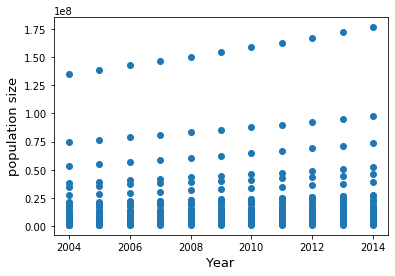

In [82]:
fig, ax = plt.subplots()
ax.scatter(x = train['year'], y = train['popsize'])
plt.ylabel('population size', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.show()

### Target variable analysis

mean mu = 22802218.60 and stan_dev_sigma = 29938711.27


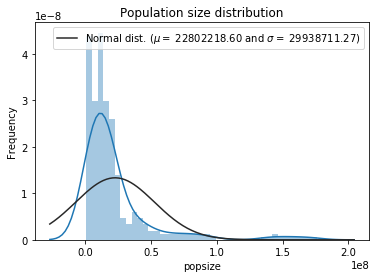

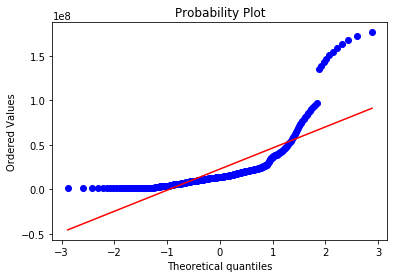

In [83]:
sns.distplot(train['popsize'], fit=norm)
# getting fit parameters used by the function
(mu, sigma) = norm.fit(train['popsize'])
print(f'mean mu = {mu:.2f} and stan_dev_sigma = {sigma:.2f}')

# plotting the distribution
plt.legend([f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f})'], loc='best')
plt.ylabel('Frequency')
plt.title('Population size distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(train['popsize'], plot=plt)
plt.show()

### Scaling the target variable

In [84]:
# Import the label encoder and standard scaler
standardScalerX = StandardScaler()
le = LabelEncoder()

In [85]:
train['popsize'] = np.log1p(train['popsize'])

In [122]:
# scale other variables
train['popsize'] = standardScalerX.fit_transform(np.array(train['popsize']).reshape(-1, 1))
train['amountPMI(Per capita aid disbursement)'] = standardScalerX.fit_transform(np.array(train['amountPMI(Per capita aid disbursement)']).reshape(-1, 1))
train['OtherDAHPMI'] = standardScalerX.fit_transform(np.array(train['OtherDAHPMI']).reshape(-1, 1))
train['Neonatal'] = standardScalerX.fit_transform(np.array(train['Neonatal']).reshape(-1, 1))


In [123]:
train.head()

,countid,country,year,popsize,PMI,amountPMI(Per capita aid disbursement),"PEPFAR (1=yes, 0=no)",OtherDAHPMI,Neonatal,average Plasmodium falciparum rate in 2-10 years old in 2005 MAP,GNI per capita in 2004-2014 (PPP),Voice and accountability,RegulatoryQuality,RuleOfLaw,health expenditure in 2004-2014,RuralPopulation,political stability index in 2004-2005,corruption index,GovEffectiveness
0,1,0,2004,0.352958,0,-0.886772,0,-0.588366,2.456216,0.2909,2610,-1.28,-1.25,-1.46,153.300674,64.595001,-1.04,-1.28,-1.28
1,1,0,2005,0.385072,1,1.029768,0,0.140841,2.413770,0.2790,3010,-1.24,-1.29,-1.44,157.521164,63.831001,-0.89,-1.33,-1.17
2,1,0,2006,0.417098,1,1.093463,0,-0.595556,2.370876,0.2461,3600,-1.23,-1.12,-1.29,209.614838,63.057999,-0.54,-1.18,-1.35
3,1,0,2007,0.449110,1,1.130116,1,-0.489732,2.334781,0.1916,4480,-1.17,-1.03,-1.39,189.901871,62.278000,-0.70,-1.29,-1.23
4,1,0,2008,0.481112,1,1.130849,1,-0.163939,2.268991,0.1242,4810,-1.13,-1.06,-1.39,242.154266,61.491001,-0.35,-1.28,-1.07


mean mu = 3.45 and stan_dev sigma = 0.25


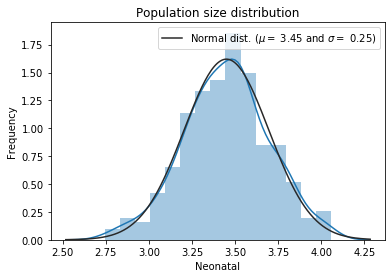

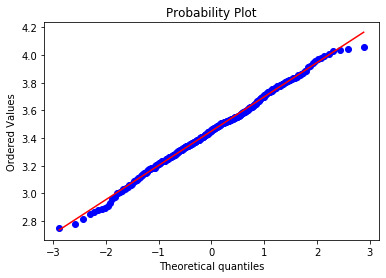

In [115]:
# checking the new distribution
sns.distplot(train['Neonatal'], fit=norm)

# getting fitted parameters used by functions
(mu, sigma) = norm.fit(train['Neonatal'])
print(f'mean mu = {mu:.2f} and stan_dev sigma = {sigma:.2f}')

#plotting the distribution
plt.legend([f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f})'], loc='best')
plt.ylabel('Frequency')
plt.title('Population size distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(train['Neonatal'], plot=plt)
plt.show()

## feature engineering

In [95]:
# transform values that are categorical
train['country'] = train['country'].astype(str)
train['year'] = train['year'].astype(str)

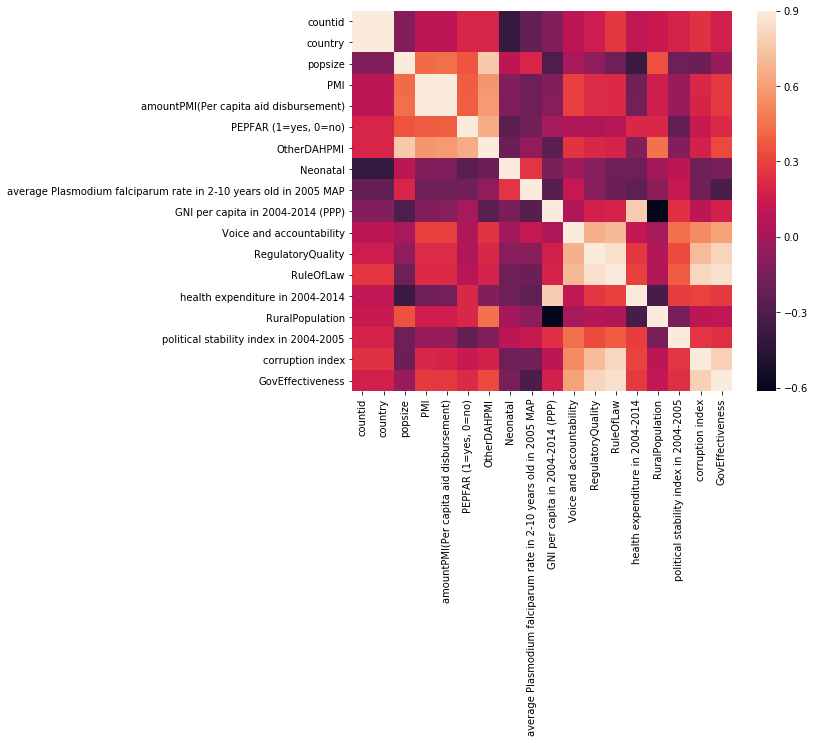

In [109]:
# analyzing data correlation with a correlation map
corrmat = train.corr()
plt.subplots(figsize=(9,7))
sns.heatmap(corrmat, vmax=0.9, square=True)

### label encode country column

In [99]:
le.fit(train['country'])

LabelEncoder()

In [100]:
list(le.classes_)

['Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Chad',
 'Congo',
 'Congo DRC',
 'Cote d棚voire',
 'Ethiopia',
 'Gabon',
 'Ghana',
 'Guinea',
 'Kenya',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Senegal',
 'Sierra Leon',
 'Swaziland',
 'Tanzania',
 'The Gambia',
 'Togo',
 'Uganda',
 'Zambia',
 'Zimbabwe']

In [101]:
train['country'] = le.transform(train['country'])

In [102]:
train.head(n=15)

,countid,country,year,popsize,PMI,amountPMI(Per capita aid disbursement),"PEPFAR (1=yes, 0=no)",OtherDAHPMI,Neonatal,average Plasmodium falciparum rate in 2-10 years old in 2005 MAP,GNI per capita in 2004-2014 (PPP),Voice and accountability,RegulatoryQuality,RuleOfLaw,health expenditure in 2004-2014,RuralPopulation,political stability index in 2004-2005,corruption index,GovEffectiveness
0,1,0,2004,16.752857,0,0,0,57720079,56.700001,0.2909,2610,-1.28,-1.25,-1.46,153.300674,64.595001,-1.04,-1.28,-1.28
1,1,0,2005,16.788616,1,1740000,0,138584938,56.099998,0.2790,3010,-1.24,-1.29,-1.44,157.521164,63.831001,-0.89,-1.33,-1.17
2,1,0,2006,16.824278,1,7500000,0,57234955,55.500000,0.2461,3600,-1.23,-1.12,-1.29,209.614838,63.057999,-0.54,-1.18,-1.35
3,1,0,2007,16.859923,1,18500000,1,64829857,55.000000,0.1916,4480,-1.17,-1.03,-1.39,189.901871,62.278000,-0.70,-1.29,-1.23
4,1,0,2008,16.895557,1,18846000,1,95637080,54.099998,0.1242,4810,-1.13,-1.06,-1.39,242.154266,61.491001,-0.35,-1.28,-1.07
5,1,0,2009,16.931226,1,18700000,1,80387725,53.400002,0.0877,5200,-1.13,-1.02,-1.24,274.734497,60.701000,-0.37,-1.42,-0.97
6,1,0,2010,16.966927,1,35500000,1,59274148,52.599998,0.0806,5210,-1.12,-1.02,-1.26,215.705765,59.903000,-0.22,-1.32,-1.13
7,1,0,2011,17.002630,1,30614000,1,50601873,51.900002,0.0857,5360,-1.12,-1.08,-1.25,220.500290,59.099998,-0.36,-1.34,-1.15
8,1,0,2012,17.038225,1,30750000,1,94296448,51.099998,0.0930,5560,-1.07,-0.96,-1.27,223.244522,58.300999,-0.38,-1.29,-1.00
9,1,0,2013,17.073543,1,28547000,1,106433869,50.400002,0.1109,5890,-1.11,-1.05,-1.26,301.989136,57.509998,-0.39,-1.33,-1.22


In [48]:
# inverse transform 0, 1 and 2
list(le.inverse_transform([0,1,2]))

['Angola', 'Benin', 'Burkina Faso']

In [106]:
data = pd.get_dummies(train)
print(data.shape)

(352, 29)


In [116]:
arr = np.array([1,2,3,4,5,6])

In [117]:
arr

array([1, 2, 3, 4, 5, 6])

In [120]:
arr.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])